In [1]:
import pandas as pd
import openpyxl

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,95,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [4]:
peoples={
     'first':['corey','jane','john'],
     'last':['schafer','doe','doe'],
     'email':['coreymschafer@gmail.com','janedoe@email.com','johndeo@email.com']  
}

In [5]:
df1=pd.DataFrame(peoples)
df1

,first,last,email
0,corey,schafer,coreymschafer@gmail.com
1,jane,doe,janedoe@email.com
2,john,doe,johndeo@email.com


In [6]:
df1.sort_values(by='first')#first or last base on senerious 

,first,last,email
0,corey,schafer,coreymschafer@gmail.com
1,jane,doe,janedoe@email.com
2,john,doe,johndeo@email.com


In [7]:
df1.sort_values(by='last','first' , ascending=True) #asc or desc (False)

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_1360/836023457.py, line 1)

In [ ]:
df.head()

In [ ]:
df.sort_values(by='Units',ascending=False).head()#units are sorted by desending order

In [ ]:
df.sort_values(by=['Units','Total'],ascending=[False,True]).head()
#units are sorted by desending and total by ascending order but data is not saved to save type inplace=True

In [ ]:
df.sort_values(by=['Units','Total'],ascending=[False,True],inplace=True)
df.head()

In [ ]:
df.sort_index().head()#to sort by index

In [ ]:
df['Item'].sort_values().head()#to sort by column

In [ ]:
df['Total'].nlargest(6)#to know n largest

In [ ]:
df.nlargest(10,'Total')#to check with complete database

In [ ]:
df.nsmallest(5,'Total')

# grouping and aggrating

In [ ]:
df.describe()

In [ ]:
df['Total'].median()

In [ ]:
df['Item'].value_counts()#to check counts

In [ ]:
df['Item'].nunique()

In [ ]:
df['Item'].value_counts(normalize=True)*100#to check percentage

In [ ]:
#a groupby operation is a combination of spliting the object applying the function and combining the results

In [ ]:
item_list=df.groupby(['Item'])#setting filter 

In [ ]:
item_list.get_group('Pencil')#filtering itms with pencils

In [ ]:
filt=df['Item']=='Pencil'
df.loc[filt]['Region'].value_counts()#filter by multiple columns

In [ ]:
item_list['Region'].value_counts()#results base on pencil

In [ ]:
item_list['Rep'].value_counts().loc['Pencil']#result base on pen

In [ ]:
item_list.head()

In [ ]:
item_list['Units'].agg(['median','mean'])#filter by all items

In [ ]:
item_list['Units'].agg(['median','mean']).loc['Binder']

# cleaning data/handling missing values

In [ ]:
import numpy as np
people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}

In [ ]:
df1=pd.DataFrame(people)
df1

In [ ]:
df1.dropna()#to remove missing values

In [ ]:
df1.dropna(axis='index',how='all')#kept row which has atleast one value works by rows(index given)

In [ ]:
df1.dropna(axis='columns',how='all')#none of column has empy values

In [ ]:
df1.dropna(axis='index',how='any',subset=['email'])#removing rows which are empty on email column

In [ ]:
df1.replace('NA',np.nan,inplace=True)
df1.replace('Missing',np.nan,inplace=True)
#here in this raw data we have 'NA' AND 'Missing' vlaue in roe to replace in nana

In [ ]:
df1#raw data is replace by nan

In [ ]:
df1.isna()#to check nan values

In [ ]:
df1.fillna('missing')#to fill nan values

In [ ]:
df1.dtypes

In [ ]:
df1['age'].mean()#cant work on obj only on int so need to convert data type to int

In [ ]:
df1['age']=df1['age'].astype(float)
#cant change to int bcz..values contain 'missing' name need to change to int number by fillna(0)
#or convert to float datatype

In [ ]:
df1.dtypes

In [ ]:
df1['age'].mean()

In [ ]:
df.dtypes

# date and time series

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.loc[0,'OrderDate']

In [ ]:
df.loc[0,'OrderDate'].day_name()

In [ ]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],format='%Y-%m-%d %I-%p')
#to set string data type to datetime datatype and setting the format

In [ ]:
d_parser=lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df=pd.read_csv('filename',parse_dates=['date'],date_parser=d_parser)
#to chnge datatype to datetime when loading csv file and changing format

In [ ]:
df['OrderDate'].dt.day_name().head()#to know which day of complete column

In [ ]:
df['week']=df['OrderDate'].dt.day_name()
df.head()#to add new column

In [ ]:
df['OrderDate'].min()# to check the earliest date

In [ ]:
df['OrderDate'].max()#to check most resent date

In [ ]:
df['OrderDate'].max()-df['OrderDate'].min()#to check difference between earliest and latest(gap)

In [ ]:
filt=(df['OrderDate']>='2020')
df[filt].head()

In [ ]:
filt=(df['OrderDate']>='2019') &(df['OrderDate']>='2020')
df[filt].head()#one way to filter (str)

In [ ]:
filt=(df['OrderDate'] >= pd.to_datetime('2020-01-15')) &(df['OrderDate'] <=pd.to_datetime('2020-03-24'))
df[filt]#another way to filter with datetime datatype

In [ ]:
df.set_index('OrderDate').head()#setting index to order column

In [9]:
df.head()#index not save type inplace=true to save chnages made

,Region,Rep,Item,Units,Unit Cost,Total
OrderDate,,,,,,
2019-01-06,East,Jones,Pencil,95,1.99,189.05
2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
2019-02-26,Central,Gill,Pen,27,19.99,539.73
2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [8]:
df.set_index('OrderDate',inplace=True)
df.head()

,Region,Rep,Item,Units,Unit Cost,Total
OrderDate,,,,,,
2019-01-06,East,Jones,Pencil,95,1.99,189.05
2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
2019-02-26,Central,Gill,Pen,27,19.99,539.73
2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [11]:
df['2020'].head()

C:\Users\acer01\AppData\Local\Temp/ipykernel_1360/4274888025.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020'].head()


,Region,Rep,Item,Units,Unit Cost,Total
OrderDate,,,,,,
2020-01-15,Central,Gill,Binder,46,8.99,413.54
2020-02-01,Central,Smith,Binder,87,15.00,1305.00
2020-02-18,East,Jones,Binder,4,4.99,19.96
2020-03-07,West,Sorvino,Binder,7,19.99,139.93
2020-03-24,Central,Jardine,Pen Set,50,4.99,249.50


In [13]:
df.loc['2020'].head() #or df['2020-01-15':'2020-02-25']#using slicing

,Region,Rep,Item,Units,Unit Cost,Total
OrderDate,,,,,,
2020-01-15,Central,Gill,Binder,46,8.99,413.54
2020-02-01,Central,Smith,Binder,87,15.00,1305.00
2020-02-18,East,Jones,Binder,4,4.99,19.96
2020-03-07,West,Sorvino,Binder,7,19.99,139.93
2020-03-24,Central,Jardine,Pen Set,50,4.99,249.50


In [14]:
df['2020-01-15':'2020-02-25']['Total']

OrderDate
2020-01-15     413.54
2020-02-01    1305.00
2020-02-18      19.96
Name: Total, dtype: float64

In [15]:
df['2020-01-15':'2020-02-25']['Total'].mean()

579.5

In [16]:
df['2020-01-15':'2020-02-25']['Total'].max()

1305.0

In [18]:
df['Total'].resample('D').max()#to check high vlues of each day

OrderDate
2019-01-06    189.05
2019-01-07       NaN
2019-01-08       NaN
2019-01-09       NaN
2019-01-10       NaN
               ...  
2020-12-17       NaN
2020-12-18       NaN
2020-12-19       NaN
2020-12-20       NaN
2020-12-21    139.72
Freq: D, Name: Total, Length: 716, dtype: float64

In [20]:
%matplotlib inline

<AxesSubplot:xlabel='OrderDate'>

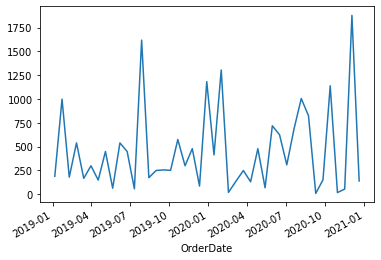

In [22]:
df['Total'].plot()

In [23]:
df.resample('W').mean()#give result on date column on weeakly bases

,Units,Unit Cost,Total
OrderDate,,,
2019-01-06,95.0,1.99,189.05
2019-01-13,NaN,NaN,NaN
2019-01-20,NaN,NaN,NaN
2019-01-27,50.0,19.99,999.50
2019-02-03,NaN,NaN,NaN
...,...,...,...
2020-11-29,NaN,NaN,NaN
2020-12-06,94.0,19.99,1879.06
2020-12-13,NaN,NaN,NaN


In [27]:
df.resample('W').agg({'Units':'mean','Unit Cost':'max','Total':'sum'})

,Units,Unit Cost,Total
OrderDate,,,
2019-01-06,95.0,1.99,189.05
2019-01-13,NaN,NaN,0.00
2019-01-20,NaN,NaN,0.00
2019-01-27,50.0,19.99,999.50
2019-02-03,NaN,NaN,0.00
...,...,...,...
2020-11-29,NaN,NaN,0.00
2020-12-06,94.0,19.99,1879.06
2020-12-13,NaN,NaN,0.00
